<a href="https://colab.research.google.com/github/REMSFALCOR/PruebaRepositorio/blob/master/Copia_de_UEMC_Tema5_2_texto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import sys

max_features = 1000
maxlen = 50

(x_train_org, y_train_org), (x_test, y_test) = reuters.load_data(path="reuters.npz",
                                                         num_words=max_features,
                                                         maxlen=maxlen,
                                                         test_split=0.2)

y_train = to_categorical(y_train_org, num_classes=46)
y_test = to_categorical(y_test, num_classes=46)

x_train = sequence.pad_sequences(x_train_org, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)


In [ ]:
wordDict = {y:x for x,y in reuters.get_word_index().items()}

for index in x_train[22]:
  word = wordDict.get(index - 3)
  if word is not None:
    sys.stdout.write (word + ' ')

united companies financial corp said its board declared a two pct stock dividend payable april eight to holders of record march 17 the board also declared a cash dividend of 12 5 cts payable april one to holders of record march 16 reuter 3 

In [ ]:
print(x_test.shape)
print(x_test[22,:])

(399, 50)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   1  53 155  26  39
   2   2  86  59   2   2 123  49   2   7 748  48  17  12]


In [ ]:
from tensorflow.keras import regularizers

model = Sequential()
model.add(layers.Embedding(max_features, 64))
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.LSTM(32))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

print(model.summary())

history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(x_test,y_test))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          64000     
                                                                 
 lstm_2 (LSTM)               (None, None, 64)          33024     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_3 (Dense)             (None, 46)                2990      
                                                      

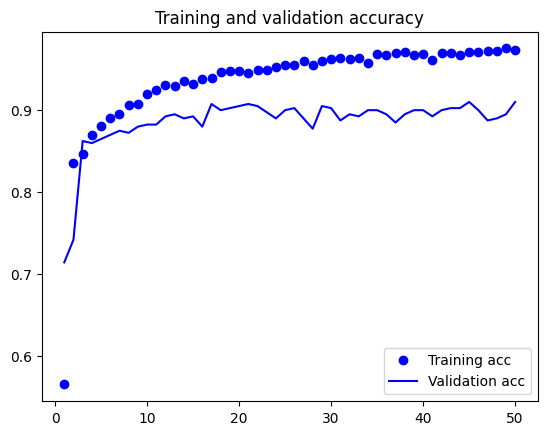

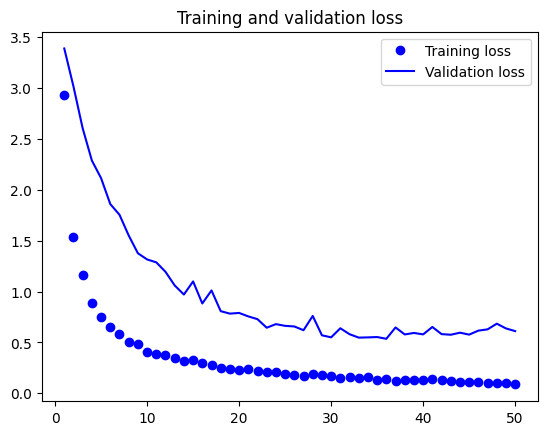

In [ ]:
from matplotlib import pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()